# FRA Crossing General Data

[Data Pulled 9/18/2023 - Source.](https://safetydata.fra.dot.gov/OfficeofSafety/publicsite/DownloadCrossingInventoryData.aspx)

[FRA Guidance for Preparing Accident/Incident Reports](https://railroads.dot.gov/sites/fra.dot.gov/files/fra_net/18812/FRA%20GUIDE%202003.pdf)

[Crossing Data Definitions](https://railroads.dot.gov/sites/fra.dot.gov/files/2023-08/GCIS_Data_Dictionary_External_Use_v3-2-0-152_Rel_06-21-2022.pdf)

[Crossing Accident Data Definitions](https://railroads.dot.gov/sites/fra.dot.gov/files/2019-09/gxirfile_ThruMay2011.pdf) (Outdated for most recent form)

[Crossing Accident Form](https://railroads.dot.gov/sites/fra.dot.gov/files/2021-12/FRA%20F%206180.57.pdf)

Socrata endpoint for the API: [https://data.transportation.gov/resource/7wn6-i5b9.json](https://data.transportation.gov/resource/7wn6-i5b9.json) (Also available in csv)

## Purpose

This document sets out to identify high risk crossings within the state of Ohio for potential elimination by various 'crossing elimination programs'

Example of extracting a single raw datapoint via python/pandas:

In [ ]:
import pandas as pd
#crossing_df = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\csv files\\OH_StateCrossingData.csv", low_memory=False)
crossing_df = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\csv files\\OH_StateCrossingData.csv", low_memory=False)

In [ ]:
entry = crossing_df.iloc[0]

In [ ]:
for label, value in entry.items():
    padding = '\t' * (5 - (len(label) // 4))
    print(f"{label}:{padding} {value}")

# Translating Crossing Data

The above entries don't mean much without being [translated to a useable form.](https://safetydata.fra.dot.gov/GCIS/Help/ReferenceDocuments/GCIS_Data_Dictionary_External_Use_v3-2-0-152_Rel_06-21-2022.pdf) This document attempts to utilize the same layout format.

The data sources consists of two parts;

## Seven Main Tables 

1. CI_CrossingHeader
1. CI_LocationAndClassification
1. CI_ReportBase
1. CI_OperatingRailroad
1. CI_PhysicalCharacteristics
1. CI_HighwayTrafficControlDevice
1. CI_PublicHighway

![Database Schema](res/imgs/GradeCrossingDatabaseSchema.png)

## Three 'Lookup' Tables

1. CI_Lookups
1. Lp_Reason
1. CI_Errors

### Tables Storing Crossing Inventory Records

#### CI_CrossingHeader

This table contains data related to the crossing and ownership information of the Primary Operating Railroad Agency.

| Column Name           | Description                                                       | Field Value                                                  | Type        |
|:---------------------:|:-----------------------------------------------------------------:|:------------------------------------------------------------:|:-----------:|
| AgencyId              | The Reporting Agency Type ID from which the submission originated | 1 = Railroad<br>2 = State<br>3 = Transit<br>4 = FRA Internal | int         |
| CountyCode            | The code assigned to each U.S. County                             |                                                              | varchar(5)  |
| CrossingID            | Primary Key. Also the Crossing Inventory Number.                  |                                                              | varchar(50) |
| PublishedReportBaseId | Foreign key to the CI_ReportBase table                            |                                                              | int         |
| StateCode             | The code assigned to each U.S. State                              |                                                              | varchar(5)  |
| Created               | Date for which the original submission was created                | Date and Time<br>(Eastern Standard Time)                     | datetime    | 
| CreatedBy             | Username of the user who originally submitted the records         |                                                              | varchar(50) |
| LastUpdated           | Date for which the existing submission was modified               | Date and Time<br>(Eastern Standard Time)                     | datetime    |
| LastUpdatedBy         | Username of the user who last submitted the updated records       |                                                              | varchar(50) |

<center>Table A - Fields in CI_CrossingHeader</center>

In [ ]:
from datetime import datetime
from dataclasses import dataclass

@dataclass
class CrossingHeader:
    agency_id: int
    county_code: str
    crossing_id: str
    published_report_base_id: int
    state_code: str
    created: datetime
    created_by: str
    last_update: datetime
    last_updated_by: str

In [ ]:
# Testing our Dataclass
x = CrossingHeader(1, 'county_code', 'crossing_id', 2, 6, datetime.now(), 'test4', datetime.now(), 'test5')
x.state_code

#### CI_HighwayTrafficControlDevice

This table stores information pertaining to Part III: Highway or Pathway Traffic Control Device information of the Grade Crossing Inventory Form  (6180.71). Detailed information regarding the table is described below. 

|Box No.<br>on Form| Column Name | Description                                | Field Value | Type         |
|:---------------:|:-----------:|:------------------------------------------:|:-----------:|:------------:|
| III.2.D         | AdvW10_1    | Count of Advance Warning Signs W10-1 flag  |             | numeric(1,0) |
| III.2.D         | AdvW10_11   | Count of Advance Warning Signs W10-11 flag |             | numeric(1,0) |
| III.2.D         | AdvW10_12   | Count of Advance Warning Signs W10-12 flag |             | numeric(1,0) |
| III.2.D         | AdvW10_2    | Count of Advance Warning Signs W10-2 flag  |             | numeric(1,0) |
| III.2.D         | AdvW10_3    | Count of Advance Warning Signs W10-3 flag  |             | numeric(1,0) |
| III.2.D         | AdvW10_4    | Count of Advance Warning Signs W10-4 flag  |             | numeric(1,0) |

<center>Table C - Fields in CI_HighwayTraffiControlDevice</center>

|Box No.<br>on Form| Column Name  | Description                                                                           | Field Value                                                                                         | Type         |
|:----------------|:--------------|:--------------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------|:-------------|
| III.2.D        | AdvWarn       | Advance Warning Signs                                                                 | 0: None<br>1: W10-1<br>2: W10-2<br>3: W10-3<br>4: W10-4<br>11: W10-11<br>12: W10-12                 | varchar(32)  |
| III.3.F        | AwdIDate      | Installation date of current Active Warning Devices                                   | MMYYYY<br>(-1 indicates "Not Required")                                                             | varchar(6)   |
| III.3.G        | AwhornChk     | Wayside Horn                                                                          | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| III.3.G        | AwhornIDate   | Wayside Horn Installed On (date)                                                      | MMYYYY                                                                                              | varchar(6)   |
| III.3.I        | Bells         | Number of Bells                                                                       |                                                                                                     | numeric(2,0) |
| III.3.D        | Bkl_FlashPost | Mast Mounted Flashing Lights: Back Lights Included                                    | 1: Yes<br>2: No                                                                                     | varchar(32)  |
| III.3.C        | CFlashType    | Type of Cantilevered (or Bridged) Flashing Light Structures                           | 0: None<br>1: Incandescent<br>2: LED                                                                | varchar(32)  |
| III.3.G        | Channel       | Channelization Devices/Medians                                                        | 1: All Approaches<br>2: One Approach<br>3: Median-All Approaches<br>4:Median-One Approach<br>5:None | varchar(1)   |
| III.2.I        | EnsSign       | ENS Sign Displayed                                                                    | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| III.2.H        | Exempt        | Exempt Signs                                                                          | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| III.3.C        | FlashNov      | Count of Cantilevered (or Bridged) Flashing Light<br>Structures Not Over Traffic Lane |                                                                                                     | numeric(2,0) |
| III.3.K        | FlashOth      | Other Flashing Lights or Warning Devices: Count                                       |                                                                                                     | numeric(2,0) |
| III.3.K        | FlashOthDes   | Other Flashing Lights or Warning Devices: Specify type                                |                                                                                                     | varchar(256) |
| III.3.C        | FlashOv       | Count of Cantilevered (or Bridged) Flashing Light Structures Over Traffic Lane        |                                                                                                     | numeric(2,0) |
| III.3.E        | FlashPai      | Total Count of Flashing Light Pairs                                                   |                                                                                                     | numeric(2,0) |
| III.3.D        | FlashPost     | Mast Mounted Flashing Lights (count)                                                  |                                                                                                     | numeric(2,0) |
| III.3.D        | FlashPostType | Mast Mounted Flashing Lights Type                                                     | 0: None<br>1: Incandescent<br>2: LED                                                                | varchar(32)  |
| III.3.B        | GateConf      | Gate Configuration                                                                    | 1: 2 Quad<br>2: 3 Quad<br>3: 4 Quad                                                                 | varchar(32)  |
| III.3.B        | GateConfType  | Type of Gate Configuration                                                            | 4: Full (Barrier) Resistance<br>6: Median Gates                                                     | varchar(32)  |
| III.3.A        | GatePed       | Count of Pedestrian Gate Arms                                                         |                                                                                                     | numeric(2,0) |
| III.3.A        | Gates         | Count of Roadway Gate Arms                                                            |                                                                                                     | numeric(2,0) |
| III.5          | HwtrfPsig     | Highway Traffic Pre-Signals                                                           | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| III.5          | HwtrfPsigIndis| Stop Line Distance (count)                                                            |                                                                                                     | numeric(3,0) |
| III.5          | HwtrfPsigsdis | Storage Distance (count)                                                              |                                                                                                     | numeric(3,0) |
| III.4.A        | HwynrSig      | Does Nearby Hwy Intersection have Traffic Signals?                                    | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| III.3.H        | HwyTrafSignl  | Highway Traffic Signals Controlling Crossing                                          | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| III.4.B        | Intrprmp      | Hwy Traffic Signal Interconnection                                                    | 1: Not Interconnected<br>2: For Traffic Signals<br>3: For Warning Signs                             | varchar(32)  |
| III.2.L        | Led           | LED Enhanced Signs                                                                    |                                                                                                     | varchar(256) |
| III.2.E        | Low_Grnd      | Low Ground Clearance Signs                                                            | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| III.2.E        | Low_GrndSigns | Number of Low Ground Clearance Signs                                                  |                                                                                                     | numeric(2,0) |
| III.6          | MonitorDev    | Highway Monitoring Devices                                                            | 0: None<br>1: Yes-Photo/Video Recording<br>2: Yes-Vehicle Presence Detection                        | varchar(32)  |
| III.1          | NoSigns       | Are there Signs or Signals?                                                           | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| III.2.J        | OthDes1       | Specify Type of Other MUTCD Signs                                                     |                                                                                                     | varchar(10)  |
| III.2.J        | OthDes2       | Specify Type of Other MUTCD Signs 2                                                   |                                                                                                     | varchar(10)  |
| III.2.J        | OthDes3       | Specify Type of Other MUTCD Signs 3                                                   |                                                                                                     | varchar(10)  |
| III.2.J        | OthSgn        | Other MUTCD Signs                                                                     | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| II.2.J         | OthSgn1       | Number of Other MUTCD Signs                                                           |                                                                                                     | numeric(2,0) |
| III.2.J        | OthSgn2       | Number of Other MUTCD Signs 2                                                         |                                                                                                     | numeric(2,0) |
| III.2.J        | OthSgn3       | Number of Other MUTCD Signs 3                                                         |                                                                                                     | numeric(2,0) |
| III.2.F        | PaveMrkIDs    | Pavement Markings                                                                     | 0: None<br>1: Stope Lines<br>2: RR Xing Symbols<br>3: Dynamic Envelope                              | varchar(32)  |
| III.4.C        | PrempType     | Highway Traffic Signal Preemption                                                     | 1: Simultaneous<br>2: Advance                                                                       | varchar(1)   |
| III.2.K        | PrvxSign      | Private Crossing Signs                                                                | 1: Yes<br>2: No                                                                                     | varchar(1)   |
|                | ReportBaseId  | Foreign Key to the CI_ReportBase table                                                |                                                                                                     | int          |
| III.3.D        | Sdl_FlashPost | Mast Mounted Flashing Lights: Side Lights Included                                    | 1: Yes<br>2: No                                                                                     | varchar(32)  |
| III.3.J        | SpecPro       | Non-Train Active Warning                                                              | 0: None<br>1: Flagging/Flagman<br>2: Manually Operated Signals<br>3: Watchman<br>4: Floodlighting   | varchar(20)  |
| III.2.B        | StopStd       | Number of STOP Signs                                                                  |                                                                                                     | numeric(1,0) |
| III.2.A        | XBuck         | Number of Crossbuck Assemblies                                                        |                                                                                                     | numeric(2,0) |
| III.2.C        | YieldStd      | Number of Yield Signs                                                                 |                                                                                                     | numeric(1,0) |
|                | WdCode        | Warning Device Code                                                                   |                                                                                                     | varchar(1)   |
|                | Created       | Date for which the original submission was created                                    | Date and Time (Eastern Standard Time)                                                               | datetime     |
|                | CreatedBy     | Username of the user who originally submitted the records                             |                                                                                                     | varchar(50)  |
|                | LastUpdated   | Date for which the existing submission was modified                                   | Date and Time (Eastern Standard Time)                                                               | datetime     |
|                | LastUpdatedBy | Username of the user who last submitted the updated records                           |                                                                                                     | varchar(50)  |

<center>Table C - Fields in CI_HighwayTraffiControlDevice</center>

In [ ]:
import math
from numbers import Number

@dataclass
class HighwayTrafficControlDevice:
    AdvW10_1: Number
    AdvW10_11: Number
    AdvW10_12: Number
    AdvW10_2: Number
    AdvW10_3: Number
    AdvW10_4 : Number
    AdvWarn: str
    AwdIDate: str
    AwhornChk: str
    AwhornIDate: str
    Bells: Number
    Bkl_FlashPost: str
    CFlashType: str
    Channel: str
    EnsSign: str
    Exempt: str
    FlashNov: Number
    FlashOth: Number
    FlashOthDes: str
    FlashOv: Number
    FlashPai: Number
    FlashPost: Number
    FlashPostType: str
    GateConf: str
    GateConfType: str
    GatePed: Number
    Gates: Number
    HwtrfPsig: str
    HwtrfPsigIndis: Number
    HwtrfPsigsdis: Number
    HwynrSig: str
    HwyTrafSignl: str
    Intrprmp: str
    Led: str
    Low_Grnd: str
    Low_GrndSigns: Number
    MonitorDev: str
    NoSigns: str
    OthDes1: str
    OthDes2: str
    OthDes3: str
    OthSgn: str
    OthSgn1: Number
    OthSgn2: Number
    OthSgn3: Number
    PaveMrkIDs: str
    PrempType: str
    PrvxSign: str
    ReportBaseId: int
    Sdl_FlashPost: str
    SpecPro: str
    StopStd: Number
    XBuck: Number
    YieldStd: Number
    WdCode: str
    Created: datetime
    CreatedBy: str
    LastUpdated: datetime
    LastUpdatedBy: str

#### CI_LocationAndClassification

This table stores information pertaining to Part I: Location and Classification Information of the Grade Crossing Inventory Form (6180.71).

|Box No.<br>on Form| Column Name | Description                                                                     | Field Value                                                                                         | Type         |
|:-----------------|:------------|:--------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------|:-------------|
| I.5    | BlockNumb      | Block Number                                                                           |                                                                                                     | varchar(6)   |
| I.4    | CityCD         | The code assigned to each U.S. City                                                    |                                                                                                     | varchar(10)  |
| I.3    | cntyCD         | The code assigned to each U.S. County                                                  |                                                                                                     | varchar(10)  |
| I.23   | DevelTypID     | Type of Land Use                                 | 11: Open Space<br>12: Residential<br>13: Commercial<br>14: Industrial<br>15: Institutional<br>16: Farm<br>17: Recreational<br>18: RR Yard | varchar(32)  |
| I.6    | Highway        | Highway Type & No.                                                                     |                                                                                                     | varchar(256) |
| I.26   | HscoRrid       | HSR Corridor ID                                                        | ID (Identifier) from the GCIS Look Up reference table<br><br>(-1 indicates "N/A")<br><br>Related Field: SfxHscoRrid | varchar(4)   |
| I.35   | HwyCont        | State Contact (Telephone No.)                                                          |                                                                                                     | varchar(10)  |
| I.27   | Latitude       | Latitude                                                                               |                                                                                                     | varchar(256) |
| I.29   | LLsource       | Lat/Long Source                                                                        | 1: Actual<br>2: Estimated                                                                           | varchar(1)   |
| I.28   | Longitude      | Longitude                                                                              |                                                                                                     | varchar(256) |
| I.7    | MultFrmsFiled  | Do Other Railroads Operate a Separate Track at Crossing                                | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| I.4    | Nearest        | In/Near                                                                                | 0: In<br>1: Near                                                                                    | varchar(1)   |
| I.20   | OpenPub        | Public Access (If Private Crossing)                                                    | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| I.33   | PolCont        | Emergency Notification Telephone No.                                                   |                                                                                                     | varchar(10)  |
| I.19   | PosXing        | Crossing Position                                                                      | 1: At Grade<br>2: RR Under<br>3: RR Over                                                            | varchar(1)   |
| I.1    | Railroad       | The code associated with the primary Operating Railroad                                |                                                                                                     | varchar(32)  |
|        | ReportBaseId   | Foreign Key to the CI_ReportBase table                                                 |                                                                                                     | int          |
| I.34   | RrCont         | Railroad Contact (Telephone No.)                                                       |                                                                                                     | varchar(10)  |
| I.13   | RrID           | Line Segment                                                                           |                                                                                                     | varchar(256) |
| I.15   | RrMain         | The code associated with the Parent Railroad                                           | Valid Railroad or Company Code<br>(-1 is a code meaning "N/A")                                      | varchar(32)  |
| I.32.A | RrNarr         | Railroad Narrative                                                                     |                                                                                                     | varchar(max) |
| I.30.A | RrNarr1        | Railroad narrative A                                                                   |                                                                                                     | varchar(256) |
| I.30.B | RrNarr2        | Railroad narrative B                                                                   |                                                                                                     | varchar(256) |
| I.30.C | RrNarr3        | Railroad narrative C                                                                   |                                                                                                     | varchar(256) |
| I.30.D | RrNarr4        | Railroad narrative D                                                                   |                                                                                                     | varchar(256) |
| I.8    | SameInd        | Do other Railroads Operate Over Your Track at Crossing?                                | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| I.8    | SameRr1        | The code associated with the Railroad selected in the 1st drop-down list for field I.8 |                                                                                                     | varchar(32)  |
| I.8    | SameRr2        | The code associated with the Railroad selected in the 2nd drop-down list for field I.8 |                                                                                                     | varchar(32)  |
| I.8    | SameRr3        | The code associated with the Railroad selected in the 3rd drop-down list for field I.8 |                                                                                                     | varchar(32)  |
| I.8    | SameRr4        | The code associated with the Railroad selected in the 4th drop-down list for field I.8 |                                                                                                     | varchar(32)  |
| I.7    | SepInd         | Do Other Railroads Operate a Seperate Track at Crossing?                               | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| I.7    | SepRr1         | The code associated with the Railroad selected in the 1st drop-down list for field I.7 |                                                                                                     | varchar(32)  |
| I.7    | SepRr2         | The code associated with the Railroad selected in the 2nd drop-down list for field I.7 |                                                                                                     | varchar(32)  |
| I.7    | SepRr3         | The code associated with the Railroad selected in the 3rd drop-down list for field I.7 |                                                                                                     | varchar(32)  |
| I.7    | SepRr4         | The code associated with the Railroad selected in the 4th drop-down list for field I.7 |                                                                                                     | varchar(32)  |
| I.26   | SfxHscoRrid    | HSR Corridor ID Suffix                                                                 | Rail-Section Identifier (numeric 1-9) or 'X' if numeric not used.                                   | varchar(4)   |
| I.2    | StateCD        | The code assigned to each U.S. States                                                  |                                                                                                     | varchar(2)   |
| I.32.B | StNarr         | State Narrative                                                                        |                                                                                                     | varchar(max) |
| I.31.A | StNarr1        | State narrative A                                                                      |                                                                                                     | varchar(256) |
| I.31.B | StNarr2        | State narrative B                                                                      |                                                                                                     | varchar(256) |
| I.31.C | StNarr3        | State narrative C                                                                      |                                                                                                     | varchar(256) |
| I.31.D | StNarr4        | State narrative D                                                                      |                                                                                                     | varchar(256) |
| I.5    | Street         | Street or Road name                                                                    |                                                                                                     | varchar(256) |
| I.14   | Tst            | Timetable Station                                                                      |                                                                                                     | varchar(6)   |
| I.14   | TstnNam        | Nearest RR Timetable Station                                                           |                                                                                                     | varchar(256) |
| I.21   | TypeTrnSrvcIDs | Type of Train Service                                                 | 11: Freight<br>12: Intercity Passenger<br>13: Commuter<br>14: Transit<br>15: Shared Use Transit<br>16: Tourist/Other | varchar(32)  |
| I.17   | TypeXing       | Crossing Type                                                                          | 2: Private<br>3: Public                                                                             | varchar(1)   |
| I.25   | Whistban       | Quiet Zone                                                                             | 0: No<br>1: 24 hr<br>2: Partial<br>3: Chicago Excused                                               | varchar(1)   |
| I.25   | WhistDate      | Date Established (Quiet Zone)                                                          |                                                                                                     | datetime     |
| I.24   | XingAdj        | Is there an Adjacent Crossing with a Separate Number?                                  | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| I.16   | XingOwnr       | Crossing Owner (RR ID)                                                                 | Valid Railroad or Company Code<br>(-1 is a code meaning "N/A")                                      | varchar(32)  |
| I.24   | XngAdjNo       | If Yes, Provide Crossing number                                                        |                                                                                                     | varchar(7)   |
| I.18   | XPurpose       | Crossing Purpose                                                                       | 1: Highway<br>2: Pathway, Pedestrian<br>3: Station, Pedestrian                                      | varchar(1)   |
|        | Created        | Date for which the original submission was created                                     | Date and Time<br>(Eastern Standard Time)                                                            | datetime     |
|        | CreatedBy      | Username of the user who originally submitted the records                              |                                                                                                     | varchar(50)  |
|        | LastUpdated    | Date for which the existing submission was modified                                    | Date and Time<br>(Eastern Standard Time)                                                            | datetime     |
|        | LastUpdatedBy  | Username of the user who last submitted the updated records                            |                                                                                                     | varchar(50)  |

<center>Table D - Fields in CI_LocationAndClassification</center>

In [ ]:
@dataclass
class LocationAndClassification:
    BlockNumb: str
    CityCD: str
    cntyCD: str
    DevelTypID: str
    Highway: str
    HscoRrid: str
    HwyCont: str
    Latitude: str
    LLsource: str
    Longitude: str
    MultFrmsFiled: str
    Nearest: str
    OpenPub: str
    PolCont: str
    PosXing: str
    Railroad: str
    ReportBaseId: int
    RrCont: str
    RrID: str
    RrMain: str
    RrNarr: str
    RrNarr1: str
    RrNarr2: str
    RrNarr3: str
    RrNarr4: str
    SameInd: str
    SameRr1: str
    SameRr2: str
    SameRr3: str
    SameRr4: str
    SepInd: str
    SepRr1: str
    SepRr2: str
    SepRr3: str
    SepRr4: str
    SfxHscoRrid: str
    StateCD: str
    StNarr: str
    StNarr1: str
    StNarr2: str
    StNarr3: str
    StNarr4: str
    Street: str
    Tst: str
    TstnNam: str
    TypeTrnSrvcIDs: str
    TypeXing: str
    Whistban: str
    WhistDate: datetime
    XingAdj: str
    XingOwnr: str
    XngAdjNo: str
    XPurpose: str
    Created: datetime
    CreatedBy: str
    LastUpdated: datetime
    LastUpdatedBy: str

#### CI_OperatingRailroad

This table contains 2 Primary Keys consisting of the OperatingRailroadCode and OperatingRailroadType that distinctly identifies that the record 
is a Multiple Forms Filed (MFF) record and the ReportBaseId that is a foreign key to the CI_ReportBase table capturing the Header 
information. It also captures data for Part II: Railroad Information of the Grade Crossing Inventory Form (6180.71).

|Box No.<br>on Form| Column Name | Description                                                          | Field Value                                                                                         | Type         |
|:-----------------|:------------|:---------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------|:-------------|
| I.11   | Branch                | Branch or Line Name                                                  | Any Alphanumeric Data<br>(#N\A is a code meaning "None")                                            | varchar(256) |
| II.1.A | DayThru               | Total Daylight Thru Trains                                           |                                                                                                     | numeric(3,0) |
| II.7.A | EMonitorDvce          | Event Recorder                                                       | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| II.7.B | HealthMonitor         | Remote Health monitoring                                             | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| II.4   | IndustryTrk           | Number of Industry tracks                                            |                                                                                                     | numeric(2,0) |
| II.1.E | Lt1Mov                | Check if Less Than One Movement Per Day                              | 1: Less Than One Movement Per Day<br>2: One or More Movements Per Day                               | varchar(1)   |
| I.22   | Lt1PassMov            | Average Passenger Train Count Per Day: Less Than One Per Day         | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| II.4   | MainTrk               | Number of Main tracks                                                |                                                                                                     | numeric(2,0) |
| II.3.B | MaxSpd                | Typical Speed Range Over Crossing - MaxTypical Speed                 |                                                                                                     | numeric(3,0) |
| II.3.A | MaxTtSpd              | Maximum Timetable Speed                                              |                                                                                                     | numeric(3,0) |
| I.12   | MilePost              | RR Milepost Number                                                   |                                                                                                     | varchar(8)   |
| II.3.B | MinSpd                | Typical Speed Range Over Crossing (minimum)                          |                                                                                                     | numeric(3,0) |
| II.1.B | NghtThru              | Total Night time Thru Trains                                         |                                                                                                     | float        |
|        | OperatingRailroadCode | Primary Key. The code associated with the Primary Operating Railroad |                                                                                                     | varchar(32)  |
|        | OperatingRailroadType | Primary Key. The type distinguishing whether the operating Railroad is the Primary, Operate a Separate Track, or Operate Over a track | Primay: Primary Operating Railroad<br>Samerr: Operate Over Your Track at Crossing<br>Seprr: Operate a Separate Track at Crossing | varchar(10) |
| I.22   | PassCnt               | Average Passenger Train Count Per Day: Number per day                |                                                                                                     | numeric(3,0) |
| I.12   | PrfxMilePost          | RR Milepost Prefix                                                   |                                                                                                     | varchar(3)   |
|        | ReportBaseId          | Foreign Key to the CI_ReportBase table                               |                                                                                                     | int          |
| I.9    | RrDiv                 | Railroad Division or Region                                          | Any Alphanumeric Data<br>(#N\A is a code meaning "None")                                            | varchar(256) |
| I.10   | RrSubDiv              | Railroad Subdivision or District                                     | Any Alphanumeric Data<br>(#N\A is a code meaning "None")                                            | varchar(256) |
| I.12   | SfxMilePost           | RR Milepost Suffix                                                   |                                                                                                     | varchar(3)   |
| II.6   | Sgnleqp               | Is Track Signaled                                                    | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| II.4   | SidingTrk             | Number of Siding Tracks                                              |                                                                                                     | numeric(2,0) |
| II.5   | SpselIDs              | Train Detection                                                | 0: None<br>11: Constant Warning Time<br>12: Motion Detection<br>14: Other<br>16: AFO<br>17: PTC<br>18: DC | varchar(32)  |
| II.1.D | TotalLtr              | Total Transit Trains                                                 |                                                                                                     | float        |
| II.1.C | TotalSwt              | Total Switching Trains                                               |                                                                                                     | float        |
| II.4   | TransitTrk            | Number of Transit tracks                                             |                                                                                                     | numeric(2,0) |
| II.1.E | WeekTrnMov            | How many Trains per Week                                             |                                                                                                     | float        |
| II.4   | YardTrk               | Number of Yard tracks                                                |                                                                                                     | numeric(2,0) |
| II.2   | YearTrnMov            | Year of Train Count Data                                             |                                                                                                     | float        |
|        | Created               | Date for which the original submission was created                   | Date and Time<br>(Eastern Standard Time)                                                            | datetime     |
|        | CreatedBy             | Username of the user who originally submitted the records            |                                                                                                     | varchar(50)  |
|        | LastUpdated           | Date for which the existing submission was modified                  | Date and Time<br>(Eastern Standard Time)                                                            | datetime     |
|        | LastUpdatedBy         | Username of teh user who last submitted the updated records          |                                                                                                     | varchar(50)  |

<center>Table E - Fields in CI_OperatingRailroad</center>

In [ ]:
@dataclass
class OperatingRailroad:
    Branch: str
    DayThru: Number
    EMonitorDvce: str
    HealthMonitor: str
    IndustryTrk: Number
    Lt1Mov: str
    Lt1PassMov: str
    MainTrk: Number
    MaxSpd: Number
    MaxTtSpd: Number
    MilePost: str
    MinSpd: Number
    NghtThru: float
    OperatingRailroadCode: str
    OperatingRailroadType: str
    PassCnt: Number
    PrfxMilePost: str
    RrDiv: str
    RrSubDiv: str
    SfxMilePost: str
    Sgnleqp: str
    SidingTrk: Number
    SpselIDs: str
    TotalLtr: float
    TotalSwt: float
    TransitTrk: Number
    WeekTrnMov: float
    YardTrk: Number
    YearTrnMov: float
    CreatedDate: datetime
    CreatedBy: str
    LastUpdated: datetime
    LastUpdatedBy: str

#### CI_PhysicalCharacteristics

This table stores information pertaining to Part IV: Physical Characteristics of the Grade Crossing Inventory Form (6180.71).

|Box No.<br>on Form| Column Name | Description                                       | Field Value                                                                                         | Type         |
|:-----------------|:------------|:--------------------------------------------------|:----------------------------------------------------------------------------------------------------|:-------------|
| IV.8 | ComPower      | Is Commercial Power Available?                              | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| IV.3 | Downst        | Does Track Run Down a Street?                               | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| IV.6 | HwynDist      | Approximate Intersecting Roadway Distance (feet)            |                                                                                                     | numeric(4,0) |
| IV.6 | HwyNear       | Intersecting Roadway within 500 feet?                       | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| IV.2 | HwyPved       | Is Roadway/Pathway Paved?                                   | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| IV.4 | Illumina      | Is Crossing Illuminated?                                    | 1: Yes<br>2: No                                                                                     | varchar(1)   |
|      | ReportBaseId  | Foreign Key to the CI_ReportBase table                      |                                                                                                     | int          |
| IV.1 | TraficLn      | Number of Traffic Lanes Crossing Railroad                   |                                                                                                     | varchar(2)   |
| IV.1 | TraflnType    | Traffic Lane Type                                           | 1: One-way Traffic<br>2: Two-way Traffic<br>3: Divided Traffic                                      | varchar(1)   |
| IV.7 | XAngle        | Smallest Crossing Angle                                     | 1: 0°-29°<br>2: 30°-59°<br>3: 60°-90°                                                               | varchar(1)   |
| IV.5 | XSurfaceIDs   | Crossing Surface | 11: 1. Timber<br>12: 2. Asphalt<br>13: 3. Asphalt and Timber<br>14: 4. Concrete<br>15: 5. Concrete and Rubber<br>16: 6. Rubber<br>17: 7. Metal<br>18: 8. Unconsolidated<br>19: 9. Composite<br>20: 10. Other (specify) | varchar(32) |
| IV.5 | XSurfDate     | Crossing Surface Installation Date                          | MMYYYY                                                                                              | varchar(6)   |
| IV.5 | XSurfLength   | Crossing Surface Length                                     |                                                                                                     | numeric(3,0) |
| IV.5 | XSurfWidth    | Crossing Surface Width                                      |                                                                                                     | numeric(3,0) |
| IV.5 | XSurOthr      | Other Crossing Surface (description)                        |                                                                                                     | varchar(256) |
|      | Created       | Date for which the original submission was created          | Date and Time<br>(Eastern Standard Time)                                                            | datetime     |
|      | CreatedBy     | Username of the user who originally submitted the records   |                                                                                                     | varchar(50)  |
|      | LastUpdated   | Date for which the existing submission was modified         | Date and Time<br>(Eastern Standard Time)                                                            | datetime     |
|      | LastUpdatedBy | Username of the user who last submitted the updated records |                                                                                                     | varchar(50)  |

<center>Table F - Fields in CI_PhysicalCharacteristic<center>                                                                                                                                                                           

In [ ]:
@dataclass
class PhysicalCharacteristics:
    ComPower: str
    Downst: str
    HwynDist: Number
    HwyNear: str
    HwyPved: str
    Illumina: str
    ReportBaseId: int
    TraficLn: str
    TraflnType: str
    XAngle: str
    XSurfaceIDs: str
    XSurfDate: str
    XSurfLength: Number
    XSurfWidth: Number
    XSurOthr: str
    Created: datetime
    CreatedBy: str
    LastUpdated: datetime
    LastUpdatedBy: str

#### CI_PublicHighway

This table stores information pertaining to Part V: Public Highway Information of the Grade Crossing Inventory Form (6180.71).

|Box No.<br>on Form| Column Name | Description                                                        | Field Value                                                                                         | Type         |
|:-----------------|:------------|:-------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------|:-------------|
| V.7  | Aadt           | Annual Average Daily Traffic (AADT) Count                                   |                                                                                                     | varchar(6)   |
| V.7  | AadtYear       | Annual Average Daily Traffic (AADT) Year                                    |                                                                                                     | varchar(4)   |
| V.10 | EmrgncySrvc    | Emergency Servies Route                                                     | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| V.2  | HwyClassCD     | Functional Classification of Road at Crossing: Rural or Urban               | 0: (0) Rural<br>1: (1) Urban                                                                        | varchar(1)   |
| V.2  | HwyClassrdtpID | Functional Classification of Road at Crossing: Type of Highway/Roadway (ID) | 11: (1) Interstate<br>12: (2) Other Freeways and Expressways<br>13: (3) Other Principal Arterial<br>16: (4) Minor Arterial<br>17: (5) Major Collector<br>18: (6) Minor Collect<br>19: (7) Local | varchar(32) |
| V.4  | HwySpeed       | Highway Speed Limit                                                         |                                                                                                     | numeric(3,0) |
| V.4  | HwySpeedps     | Highway Speed Limit: Posted or Statutory                                    | 1: Posted<br>2: Statutory                                                                           | varchar(1)   |
| V.1  | HwySys         | Highway System                               | 1: (01) Interstate Highway System<br>2: (02) Other Nat Hwy System (NHS)<br>3: (03) Federal Aid, Not NHS<br>8: (08) Non-Federal Aid | varchar(2)   |
| V.6  | LrsMilePost    | LRS Milepost                                                                |                                                                                                     | varchar(256) |
| V.5  | LrsRouteid     | Linear Referencing System (LRS Route ID)                                    |                                                                                                     | varchar(256) |
| V.8  | PctTruk        | Estimated Percent Trucks                                                    |                                                                                                     | varchar(2)   |
|      | ReportBaseId   | Foreign key to the CI_ReportBaseTable                                       |                                                                                                     | int          |
| V.9  | SchlBsCnt      | Average Number School Bus Count per Day                                     |                                                                                                     | numeric(3,0) |
| V.9  | SchlBusChk     | Regularly Used by School Buses?                                             | 1: Yes<br>2: No                                                                                     | varchar(1)   |
| V.3  | StHwy1         | Is Crossing on State Highway System?                                        | 1: Yes<br>2: No                                                                                     | varchar(1)   |
|      | Created        | Date for whcih the original submission was created                          | Date and Time<br>(Eastern Standard Time)                                                            | datetime     |
|      | CreatedBy      | Username of the user who originally submitted the records                   |                                                                                                     | varchar(50)  |
|      | LastUpdated    | Date for which the existing submission was modified                         |                                                                                                     | datetime     |
|      | LastUpdatedBy  | Username of the user who last submitted the updated records                 | Date and Time<br>(Eastern Standard Time)                                                            | varchar(50)  |
              
<center>Table G - Fields in CI_PublicHighway<center>

In [ ]:
@dataclass
class PublicHighway:
    Aadt: str
    AadtYear: str
    EmrgncySrvc: str
    HwyClassCD: str
    HwyClassrdtpID: str
    HwySpeed: Number
    HwySpeedps: str
    HwySys: str
    LrsMilePost: str
    LrsRouteid: str
    PctTruk: str
    ReportBaseId: int
    SchlBsCnt: Number
    SchlBusChk: Number
    StHwy1: str
    Created: datetime
    CreatedBy: str
    LastUpdated: datetime
    LastUpdatedBy: str

#### CI_ReportBase

This table stores the Header information, as well as the crossing records where the Primary Operating Railroad selected the value of Yes for field 
I.7 Do Other Railroads Operate a Separate Track at Crossing? This means that the Primary Operating Railroad is listing up to four (4) additional 
railroads to submit their railroad and train count data. These submissions will be flagged with a value of 1 in the database, denoting that the record 
is a Multiple Forms Filed (MFF) record. Detailed information regarding the table is described in the table below.

|Box No.<br>on Form| Column Name | Description                                                 | Field Value                                                                                         | Type         |
|:----------------:|:-----------:|:-----------------------------------------------------------:|:---------------------------------------------------------------------------------------------------:|:------------:|
|      | CrossingClosed          | Crossing Closed Indicator                                   | 1: Closed<br>2: Open                                                                                | int          |
| D    | CrossingID              | DOT Crossing Inventory Number                               |                                                                                                     | varchar(20)  |
| D    | CrossingIdSuffix        | Crossing ID suffix                                          |                                                                                                     | varchar(20)  |
|      | MultipleFormsFiled      | Multiple Forms Filed (boolean)                              | 1: Yes<br>2: No                                                                                     | int          |
|      | ParentReportBaseId      | Unique ID for all crossings in this table                   |                                                                                                     | int          |
| A    | PostmarkDate            | Submission Date                                             |                                                                                                     | Datetime     |
| C    | ReasonID | Reason for Update | 14: Change in Data<br>15: New Crossing<br>16: Closed<br>19: Re-Open<br>20: Date Change Only<br>21: Change in Primary Operating RR<br>22: Admin. Correction<br>23: Quiet Zone Update<br>24: No Train Traffic | int |
|      | ReportBaseID            | Foreign key to the CI_ReportBase table                      |                                                                                                     | int          |
|      | ReportingAgencyID       | Reporting Agency ID                                         |                                                                                                     | int          |
| B    | ReportingAgencyTypeID   | Reporting Agency Type ID                                    | 1: Railroad<br>2: State<br>3: Transit<br>4: FRA Internal                                            | int          |
|      | ReportStatus            | The status of the submission                                | Bulk Upload Error<br>Cancelled<br>Expired<br>Pending<br>Published                                   | varchar(20)  |
|      | ReportType | Major or Minor Railroad (used for MFF) | Major: Primary Operating Railroad Submitting the Full Crossing Inventory Record<br>Minor: A railroad agency submitting only the railroad and train count data | varchar(20)  |
| A    | RevisionDate            | Revision Date                                               |                                                                                                     | Datetime     |
|      | ValidationErrors        | Stores all the error codes(s) that failed validation        |                                                                                                     | varchar(4000)|
|      | Created                 | Date for which the original submission was created          | Date and Time<br>(Eastern Standard Time)                                                            | datetime     |
|      | CreatedBy               | Username of the user who originally submitted the records   |                                                                                                     | varchar(50)  |
|      | LastUpdated             | Date for which the existing submission was modified         | Date and Time<br>(Eastern Standard Time)                                                            | datetime     |
|      | LastUpdatedBy           | Username of the user who last submitted the updated records |                                                                                                     | varchar(50)  |
              
<center>Table H - Fields in CI_ReportBase<center>

In [ ]:
@dataclass
class ReportBase:
    CrossingClosed: int
    CrossingID: str
    CrossingIdSuffix: str
    MultipleFormsFiled: int
    ParentReportBaseId: int
    PostmarkDate: datetime
    ReasonID: int
    ReportBaseID: int
    ReportingAgencyID: int
    ReportingAgencyTypeID: int
    ReportStatus: str
    ReportType: str
    RevisionDate: datetime
    ValidationErrors: str
    Created: datetime
    CreatedBy: str
    LastUpdated: datetime
    LastUpdatedBy: str

### Tables that Store Lookup Values

#### CI_Errors

This table contains all the validation error messages that are returned by the system. 

| Column Name         | Description                                                                                                    | Field Value                                      | Type         |
|:-------------------:|:--------------------------------------------------------------------------------------------------------------:|:------------------------------------------------:|:------------:|
| Code                | Primary Key. Also the unique code assigned to each error.                                                      |                                                  | varchar(10)  |
| Description         | The description of each error message                                                                          |                                                  | varchar(MAX) |
| Section             | Stores the section name of the crossing inventory form | Header<br>PartI: Location and Classification Information<br>Part II: Railroad Information<br>Part III: Highway or Pathway Traffic Control Device Information<br>Part IV: Physical Characteristics<br>Part V: Public Highway Information | varchar(100) |
| ShowForMinorReports | Identify whether the error message should be returned<br> for users submitting the short form (Railroad Data Only) | 0: True<br>1: False                              | int          |
| ShowForRailroads    | Identify whether the error message should be returned for Railroad users                                       | 0: True<br>1: False                              | int          |
| ShowForStates       | Identify whether the error message should be returned for State users                                          | 0: True<br>1: False                              | int          |
| SortOrder           | Stores the sort order number                                                                                   |                                                  | int          |
| Created             | Date for which the original error was created                                                                  | Date and Time<br>(Eastern Standard Time)         | datetime     |
| CreatedBy           | Username of the user who originally created the records                                                        |                                                  | varchar(50)  |
| LastUpdated         | Date for which the existing error was modified                                                                 | Date and Time<br>(Eastern Standard Time)         | datetime     |
| LastUpdatedBy       | Username of the user who last modified the record                                                              |                                                  | varchar(50)  |
              
<center>Table I - Fields in CI_Errors<center>

In [ ]:
@dataclass
class Errors:
    Code: str
    Description: str
    Section: str
    ShowForMinorReports: int
    ShowForRailroads: int
    ShowForStates: int
    SortOrder: int
    Created: datetime
    CreatedBy: str
    LastUpdated: datetime
    LastUpdatedB: str

#### CI_Lookups

This table contains all the valid values available when completing a crossing record.

| Column Name   | Description                                                                                           | Field Value                                      | Type         |
|:-------------:|:-----------------------------------------------------------------------------------------------------:|:------------------------------------------------:|:------------:|
| Code          | The unique code associated with each lookup type                                                      |                                                  | varchar(50)  |
| EndDate       | The date in which the item is no longer active                                                        |                                                  | datetime     |
| ID            | Primary Key                                                                                           |                                                  | varchar(50)  |
| LookupText    | Description of the lookup value                                                                       |                                                  | varchar(500) |
| LookupType    | The type of lookup                                                                                    |                                                  | varchar(50)  |
| LookupValue   | The value the lookup is stored as in the database (compared to what is displayed on the front-end UI) |                                                  | varchar(50)  |
| StartDate     | The date in which the item was made active                                                            |                                                  | datetime     |
| Status        | Active/Inactive                                                                                       | 0: Inactive<br>1: Active                         | bit          |
| Created       | Date for which the original submission was created                                                    | Date and Time<br>(Eastern Standard Time)         | datetime     |
| CreatedBy     | Username of the user who orignially submitted the records                                             |                                                  | varchar(50)  |
| LastUpdated   | Date for which the existing submission was modified                                                   | Date and Time<br>(Eastern Standard Time)         | datetime     |
| LastUpdatedby | Username of the user who last submitted the updated records                                           |                                                  | varchar(50)  |
              
<center>Table J - Fields in CI_Lookups<center>

In [ ]:
@dataclass
class Lookups:
    Code: str
    EndDate: datetime
    ID: str
    LookupText: str
    LookupType: str
    LookupValue: str
    StartDate: datetime
    Status: bool
    Created: datetime
    CreatedBy: str
    LastUpdated: datetime
    LastUpdatedby: str

#### Lp_Reason

This table stores all the available values that will populate the drop-down list field in Box C. Reason for Update of the Grade Crossing 
Inventory Form (6180.71). 

| Column Name         | Description                                                                                                    | Field Value                                      | Type         |
|:-------------------:|:--------------------------------------------------------------------------------------------------------------:|:------------------------------------------------:|:------------:|
| ReasonID            | Primary Key for this table                                                                                     |                                                  | tinyint      |
| Code                | Unique code assigned to each item in this table                                                                |                                                  | varchar(3)   |
| Descr               | The description of each reason for update                                                                      |                                                  | varchar(50)  |
| StartDate           | The date in which the item was made active                                                                     |                                                  | datetime     |
| EndDate             | The date in which the item was made inactive                                                                   |                                                  | datetime     |
| SortOrder           | Username of the user who originally submitted the records                                                      |                                                  | int          |
| ShowForMinorReports | Identify whether the error message should be returned for users submitting the short form (Railroad Data Only) | 0: True<br>1: False                              | int          |
| ShowForRailroads    | Identify whether the error message should be returned for Railroad users                                       | 0: True<br>1: False                              | int          |
| ShowForStates       | Identify whether the error message should be returned for State users                                          | 0: True<br>1: False                              | int          |
              
<center>Table K - Fields in LP_Reason<center>

In [ ]:
@dataclass
class Reason:
    ReasonID: int
    Code: str
    Descr: str
    StartDate: datetime
    EndDate: datetime
    SortOrder: int
    ShowForMinorReports: int
    ShowForRailroads: int
    ShowForState: int

# Crossing Accident Data

[Data Definition Location](https://safetydata.fra.dot.gov/OfficeofSafety/publicsite/Newregulation.aspx?doc=gxirfile_ThruMay2011.pdf)

Notes:

Data format notes are included below,

1. Shown data was pulled in October for 2023, no months prior to July are included in the data.
1. The `railroad` attribute is based on a 15,000 entry list of railroad owners/companys saved as RailroadsAndCompanies.csv in the Resource table folder.
1. `iyr2`, `iyr3`, `imo2`, `imo3` seem to be columns storing the same information as `iyr` and `imo`, they also seem to be reported as floats

## Loading The Accident Data Set from 2000 to 2023

In [ ]:
import pandas as pd
from collections import defaultdict

accident_df_2023 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2023 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2022 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2022 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2021 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2021 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2020 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2020 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2019 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2019 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2018 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2018 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2017 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2017 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2016 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2016 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2015 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2015 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2014 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2014 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2013 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2013 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2012 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2012 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2011 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2011 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2010 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2010 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2009 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2009 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2008 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2008 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2007 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2007 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2006 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2006 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2005 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2005 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2004 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2004 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2003 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2003 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2002 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2002 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2001 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2001 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)
accident_df_2000 = pd.read_csv ("C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\Data\\Crossings\\Historic Data\\Accidents\\2000 All States.csv", dtype=str, low_memory=False, index_col=False, keep_default_na=False)

frames = [accident_df_2023, accident_df_2022, accident_df_2021, accident_df_2020, accident_df_2019, accident_df_2018, accident_df_2017, accident_df_2016, accident_df_2015, accident_df_2014, accident_df_2013, accident_df_2012, accident_df_2011, accident_df_2010, accident_df_2009, accident_df_2008, accident_df_2007, accident_df_2006, accident_df_2005, accident_df_2004, accident_df_2003, accident_df_2002, accident_df_2001, accident_df_2000]
all_accident_data = pd.concat(frames)

In [ ]:
all_accident_data

### Define Values for Translation of Various Fields

In [ ]:
""" # //TODO - Determine the following tanslations

type of signaled crossing warning: 
if block 32 (crossing) = 01-06, then signal = 1-7
(see back of form 57 for valid entries) (signal, sigwarnx)

ICC categories (typrr)

FIPS Codes (cntycd, stcnty, state, county, city)

fix crossing translations
"""

fra_xing_val_definitions = {

    "typveh_vals": {
        "A": "auto",
        "B": "truck",
        "C": "truck-trailer",
        "D": "pick-up truck",
        "E": "van",
        "F": "bus",
        "G": "school bus",
        "H": "motorcycle",
        "J": "other motor veh.",
        "K": "pedestrian",
        "M": "other",
        " ": "Unknown" # Added due to unknown values in dataset
    },

    "trndir_vals": {
        "1": "north",
        "2": "south",
        "3": "east",
        "4": "west",
        " ": "Unknown" # Added due to unknown values in dataset
    },

    "vehdir_vals": {
        "1": "north",
        "2": "south",
        "3": "east",
        "4": "west"
    },

    "position_vals": {
        "1": "stalled or stuck on crossing",
        "2": "stopped on crossing",
        "3": "moving over crossing",
        "4": "trapped on crossing by traffic",
        "5": "Blocked on crossing by gates"
    },

    "rrequip_vals": {
        "1": "Train (units pulling)",
        "2": "Train (units pushing)",
        "3": "Train (standing)",
        "4": "Cars moving",
        "5": "Car/s (standing)",
        "6": "Light loco/s (moving)",
        "7": "Light loco/s (standing)",
        "8": "Other",
        "A": "Training pulling (RCL)",
        "B": "Train pushing (RCL)",
        "C": "Train standing (RCL)",
        "D": "Electric Multiple Unit Locomotive(s)",
        "E": "Diesel Multiple Unit Locomotive(s)",
        " ": "Unknown" # Added due to unknown values in dataset
    },

    "typacc_vals": {
        "1": "Rail equipment struck highway user",
        "2": "Rail equipment struck by highway user",
        " ": "Unknown" # Added due to unknown values in dataset
    },

    "hazard_vals": {
        "1": "Highway user",
        "2": "Rail equipment",
        "3": "Both",
        "4": "Neither",
        " ": "Unknown" # Added due to unknown values in dataset
    },

    "visiblty_vals": {
        "1": "dawn",
        "2": "day",
        "3": "dusk",
        "4": "dark",
        " ": "Unknown" # Added due to unknown values in dataset
    },

    "weather_vals": {
        "1": "Clear",
        "2": "Cloudy",
        "3": "Rain",
        "4": "Fog",
        "5": "Sleet",
        "6": "Snow",
        " ": "Unknown" # Added due to unknown values in dataset
    },

    "typeq_vals": {
        "1": "Freight train",
        "2": "Passenger train",
        "3": "Commuter train",
        "4": "Work train",
        "5": "Single car",
        "6": "Cut of cars",
        "7": "Yard / switching",
        "8": "Light loco(s)",
        "9": "Maint / inspec car",
        "A": "Special MoW equipment",
        "B": "Passenger Train-Pushing",
        "C": "Commuter Train-Pushing",
        "D": "Electrical Multiple Unit",
        "E": "Diesel Multiple Unit",
        " ": "Unknown" # Added due to unknown values in dataset
    },

    "typtrk_vals": {
        "1": "main",
        "2": "yard",
        "3": "siding",
        "4": "industry",
        " ": "Unknown" # Added due to unknown values in dataset
    },

    "typspd_vals": {
        "E": "Estimated",
        "R": "Recorder",
        " ": "Unknown"
    },

    "locwarn_vals": {
        "1": "both sides",
        "2": "side of vehicle approach",
        "3": "opposite side of vehicle approach",
        " ": "Unknown", # Added this one myself, values like '4' and 'u' were coming in despite not being on the form 
    },

    "warnsig_vals": {
        "1": "Yes",
        "2": "No",
        "3": "Unknown"
    },

    "lights_vals": {
        "1": "Yes",
        "2": "No",
        "3": "Unknown"
    },

    "standveh_vals": {
        "1": "Yes",
        "2": "No",
        "3": "Unknown"
    },

    "train2_vals": {
        "1": "Yes",
        "2": "No",
        "3": "Unknown"
    },

    "motorist_vals": {
        "1": "Drove around or thru the gate",
        "2": "Stopped and then proceeded",
        "3": "Did not stop",
        "4": "Stopped on crossing",
        "5": "Other",
        "6": "Went around/thru temporary barricade",
        "7": "Wen thru the gate",
        "8": "Suicide/Attempted Suicide",
        " ": "Unknown" # Added due to unknown values in dataset
        
    },

    "view_vals": {
        "1": "permanent structure",
        "2": "standing RR equipment",
        "3": "passing train",
        "4": "topography",
        "5": "vegetation",
        "6": "highway vehicles",
        "7": "other",
        "8": "not obstructed",
        " ": "Unknown" # Added due to unknown values in dataset
    },

    "driver_vals": {
        "1": "killed",
        "2": "injured",
        "3": "uninjured",
        " ": "Unknown" # Added due to unknown values in dataset
    },

    "inveh_vals": {
        "1": "yes",
        "2": "no",
        " ": "Unknown" # Added due to unknown values in dataset
    },

    "incdrpt_vals": {
        "1": "yes",
        "2": "no",
        " ": "Unknown" # Added due to unknown values in dataset
    },

    "crossing_vals": {
        "01": "gates",
        "02": "cantilever fls",
        "03": "standard fls",
        "04": "wig wags",
        "05": "highway traffic Signals",
        "06": "audible",
        "07": "cross bucks",
        "08": "stop signs",
        "09": "watchman",
        "10": "flagged by crew",
        "11": "other (specify)",
        "12": "none"
    },

    "hzmrlsed_vals": {
        "1": "highway user",
        "2": "rail equipment",
        "3": "both",
        "4": "neither",
        " ": "unknown" # Added due to unknown values in dataset
    },

    "whisban_vals": {
        "1": "yes",
        "2": "no",
        "3": "not provided",
        " ": "unknown" # Added due to unknown values in dataset       
    },

    "drivgen_vals": {
        "1": "male", 
        "2": "female",
        " ": "unknown"
    },

    "roadcond_vals": {
        "A": "Dry",
        "B": "Wet",
        "C": "Snow/slush",
        "D": "Ice",
        "E": "Sand, Mud, Dirt, Oil, Gravel",
        "F": "Water (Standing, Moving)",
        " ": "Unknown"
    },

    "state_fips": {
        "01": "Alabama",
        "02": "Alaska",
        "04": "Arizona",
        "05": "Arkansas",
        "06": "California",
        "08": "Colorado",
        "09": "Connecticut",
        "10": "Delaware",
        "11": "District of Columbia",
        "12": "Florida",
        "13": "Georgia",
        "15": "Hawaii",
        "16": "Idaho",
        "17": "Illinois",
        "18": "Indiana",
        "19": "Iowa",
        "20": "Kansas",
        "21": "Kentucky",
        "22": "Louisiana",
        "23": "Maine",
        "24": "Maryland",
        "25": "Massachusetts",
        "26": "Michigan",
        "27": "Minnesota",
        "28": "Mississippi",
        "29": "Missouri",
        "30": "Montana",
        "31": "Nebraska",
        "32": "Nevada",
        "33": "New HampsireE",
        "34": "New Jersey",
        "35": "New Mexico",
        "36": "New York",
        "37": "North Carolina",
        "38": "North Dakota",
        "39": "Ohio",
        "40": "Oklahoma",
        "41": "Oregon",
        "42": "Pennsylvania",
        "44": "Rhode Island",
        "45": "South Carolina",
        "46": "South Dakota",
        "47": "Tennessee",
        "48": "Texas",
        "49": "Utah",
        "50": "Vermont",
        "51": "Virginia",
        "53": "Washington",
        "54": "West Virginia",
        "55": "Wisconsin",
        "56": "Wyoming",
        "": "Unknown" # Added due to unknown values in dataset
    }
}

## Pulling and Cleaning Stats From All Crash Records in a Given Year

Sometimes values make it into the data sets that are incorrect, in this example some values are coming in as `' '`, `''`, or `'u'`. It's assumed all of these values should be read as `unknown/NA`. Originally, some of the data was being interpreted as integers instead of strings, this was rectified by adding the `dtype=str` and `keep_default_na=False` to the `pandas.read_csv` call above.

In [ ]:
import numpy as np

# Shows all unique values in the column
print(all_accident_data['DRIVGEN'].unique())

# Converts undesired values 'u' and '' into the desired ' ' value
all_accident_data['DRIVGEN'] = all_accident_data['DRIVGEN'].replace({'u': ' ', '': ' '})

# Show the Unique values again demonstrating that the errant data has been cleaned out
print(all_accident_data['DRIVGEN'].unique())

In [ ]:
driver_gender = pd.DataFrame(all_accident_data['DRIVGEN'].value_counts(normalize=True))
driver_gender['Definition'] = driver_gender.index.to_series().map(fra_xing_val_definitions['drivgen_vals'])

In [ ]:
print(driver_gender[['Definition', 'proportion']])

The above shows 71.88% of grade crossing accidents from 2000 to 2023 had male drivers, 23.28% the driver was a female and 4.84% were unknown

In [ ]:
# Clean the data
all_accident_data['VISIBLTY'] = all_accident_data['VISIBLTY'].replace({1: '1', 2: '2', 3: '3', 4: '4'})

# Get the statistics
visibility_results = pd.DataFrame(all_accident_data['VISIBLTY'].value_counts(normalize=True))
visibility_results['Definition'] = visibility_results.index.to_series().map(fra_xing_val_definitions['visiblty_vals'])

In [ ]:
print(visibility_results[['Definition', 'proportion']])

58.62% of incidents occur during the day, 30.4% occured at night

In [ ]:
vehicle_types = pd.DataFrame(all_accident_data['TYPVEH'].value_counts(normalize=True))
vehicle_types['Vehicle'] = vehicle_types.index.to_series().map(fra_xing_val_definitions['typveh_vals'])

In [ ]:
print(vehicle_types[['Vehicle', 'proportion']].sort_values('proportion', ascending=False))

45% of accidents involved personal cars, 15.6% involved tractor trailers

In [ ]:
state_of_incident = pd.DataFrame(all_accident_data['STATE'].value_counts(normalize=True))
state_of_incident['State'] = state_of_incident.index.to_series().map(fra_xing_val_definitions['state_fips'])

In [ ]:
print(state_of_incident[['State', 'proportion']].sort_values('proportion', ascending=False))

### Remaining Fields That Require Cleaning

The following values are only the values where the submittal forms had drop down menus, fields that relied on User input, like "Highway Name" or "Name of Reporting Railroad" weren't attempted to be cleaned due to the likelihood of human error occuring during input.

**Whistle bans (Removed from form and replaced with "Road Condition" Field**

In [ ]:
all_accident_data['WHISBAN'].unique()

In [ ]:
all_accident_data['WHISBAN'] = all_accident_data['WHISBAN'].replace({'N': ' ', '': ' '})

**Warning Signals connected to highway signals**

In [ ]:
all_accident_data['WARNSIG'].unique()

In [ ]:
all_accident_data['WARNSIG'] = all_accident_data['WARNSIG'].replace({' ': '3', '': '3', '0': '3'})

**Driver Passed standing vehicle**

In [ ]:
all_accident_data['STANDVEH'].unique()

In [ ]:
all_accident_data['STANDVEH'] = all_accident_data['STANDVEH'].replace({' ': '3', '': '3'})

**Location of Warning Values**

In [ ]:
all_accident_data['LOCWARN'].unique()

In [ ]:
all_accident_data['LOCWARN'] = all_accident_data['LOCWARN'].replace({'N': ' ', '': ' ', '4': ' ', '0': ' '})

**Driver Values**

In [ ]:
all_accident_data['DRIVER'].unique()

In [ ]:
all_accident_data['DRIVER'] = all_accident_data['DRIVER'].replace({'0': ' ', '': ' ', '4': ' ', '0': ' '})

**Motorist Values**

In [ ]:
all_accident_data['MOTORIST'].unique()

In [ ]:
all_accident_data['MOTORIST'] = all_accident_data['MOTORIST'].replace({'0': ' ', '': ' '})

**"In Vehicle" Values**

In [ ]:
all_accident_data['INVEH'].unique()

In [ ]:
# one of the few were a value wasn't automatically assigned to "Unknown", 'N' is assumed to be 2 for 'No'
all_accident_data['INVEH'] = all_accident_data['INVEH'].replace({'N': '2', '': ' '})

**Second Train values**

In [ ]:
all_accident_data['TRAIN2'].unique()

In [ ]:
all_accident_data['TRAIN2'] = all_accident_data['TRAIN2'].replace({'N': '3', '': '3', ' ': '3', '5': '3'})

**Road Condition values**

In [ ]:
all_accident_data['ROADCOND'].unique()

In [ ]:
all_accident_data['ROADCOND'] = all_accident_data['ROADCOND'].replace({'': ' '})

**Hazmat Involved**

In [ ]:
all_accident_data['HAZARD'].unique()

In [ ]:
all_accident_data['HAZARD'] = all_accident_data['HAZARD'].replace({'0': ' '})

**Hazmat Released values**

In [ ]:
all_accident_data['HZMRLSED'].unique()

In [ ]:
all_accident_data['HZMRLSED'] = all_accident_data['HZMRLSED'].replace({'': ' ', '0': ' ', '9': ' '})

**Weather values**

In [ ]:
all_accident_data['WEATHER'].unique()

In [ ]:
all_accident_data['WEATHER'] = all_accident_data['WEATHER'].replace({'0': ' '})

**"Type Speed" Recording Method**

In [ ]:
all_accident_data['TYPSPD'].unique()

In [ ]:
all_accident_data['TYPSPD'] = all_accident_data['TYPSPD'].replace({'': ' '})

**"Lights" Values**

In [ ]:
all_accident_data['LIGHTS'].unique()

In [ ]:
all_accident_data['LIGHTS'] = all_accident_data['LIGHTS'].replace({'': '3', ' ': '3'})

**"Train Direction" Values**

In [ ]:
all_accident_data['TRNDIR'].unique()

In [ ]:
all_accident_data['TRNDIR'] = all_accident_data['TRNDIR'].replace({'': ' ', 'A': ' '})

**"Type of Track" Values**

In [ ]:
all_accident_data['TYPTRK'].unique()

In [ ]:
all_accident_data['TYPTRK'] = all_accident_data['TYPTRK'].replace({'': ' '})

**"Incident Report" Values**

In [ ]:
all_accident_data['INCDRPT'].unique()

In [ ]:
all_accident_data['INCDRPT'] = all_accident_data['INCDRPT'].replace({'': ' ', '4': ' '})

**"View" Values**

In [ ]:
all_accident_data['VIEW'].unique()

In [ ]:
all_accident_data['VIEW'] = all_accident_data['VIEW'].replace({'0': ' '})

These two fields were the most complicated on the form and required specific processing steps,

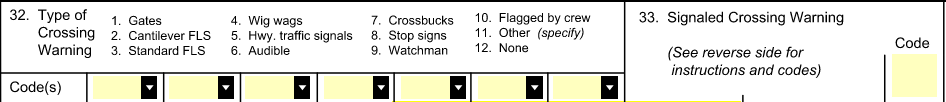

In [ ]:
def translate_xing_warning(str_to_convert):
    values = [str_to_convert[i:i+2] for i in range(0, len(str_to_convert), 2)]
    return_string = ''
    
    for value in values:
        if value == '  ':
            value = '12'
        if value != '12':
            return_string = return_string + fra_xing_val_definitions['crossing_vals'][value] + ', '
    
    return return_string[:-2]

### Answering Specific Queries

Which crossings had the most incidents in the given period within the US?

In [ ]:
# most incidents of any crossings
all_accident_data['GXID'].value_counts()[:50]

What about just for Ohio?

In [ ]:
# Sort incidents by State of Ohio
ohio_incidents = all_accident_data.loc[all_accident_data['STATE'] == '39']

In [ ]:
top_50_dangerous_ohio_crossings = ohio_incidents['GXID'].value_counts()[:50]
top_50_dangerous_ohio_crossings

## Pulling values for individual Incidents

### Define Object to Hold/Translate Fields from Records

In [ ]:
@dataclass
class XingAccident:
    """
    Class to hold and translate Railroad Accident Data from the FRA online Database
    
    Notes/TODO:
    - `railroad` attribute is a lookup of another database table where the 4 digit code is translated to a more descriptive explanation of the owner
    - First value in the comments is the data frame index representing that value
    - Second value in the comments is the block on the standard input form the value is found
    """
    amtrak: str      # 0       Amtrak involvement
    iyr: str         # 1   5   Year of incident (report)
    imo: str         # 2   5   Month of Incident
    railroad: str    # 3   1a  Reporting Railroad (See Note)
    incdtno: str     # 4   1b  Railroad assigned number
    iyr2: str        # 5   5   Year of incident
    imo2: str        # 6   5   month of incident
    rr2: str         # 7   2a  railroad code (Other RR involved)
    incdtno2: str    # 8   2b  other railroad assigned number
    iyr3: str        # 9   5   year of incident
    imo3: str        # 10  5   month of incident
    rr3: str         # 11  3a  railroad code (RR responsible for track maintenance)
    incdtno3: str    # 12  3b  RR assigned number
    dummy1: str      # 13      Blank data expansion field
    casinjrr: str    # 14      # of injured for reporting Railroad calculated from F6180.55a=s submitted
    gxid: str        # 15  4   Grade crossing id number
    year: str        # 16  5   Year of incident
    month: str       # 17  5   Month of incident
    day: str         # 18  5   Day of incident (int)
    timehr: int      # 19  6   Hour of incident
    timemin: int     # 20  6   Minute of incident
    ampm: str        # 21  6   AM or PM
    station: str     # 22  7   Nearest Timetable Station
    county: str      # 23  9   County Name (see FIPS Codes for associated code)
    state: str       # 24  10  FIPS State Code
    region: str      # 25      FRA designated region
    dummy2: str      # 26      Blank data expansion field
    city: str        # 27  11  City name (see FIPS Codes for associated code)
    highway: str     # 28  12  Highway name
    vehspd: str      # 29  14  Vehicle estimated speed - Blank=Unknown
    typveh: str      # 30  13  See Translation Table below Type of vehicle involved in accident
    vehdir: str      # 31  15  Highway user direction
    position: str    # 32  16  Position of higway (See defs below)
    rrequip: str     # 33  17  RR Equipment involved (See defs)
    rrcar: str       # 34  18  Position of car unit in train
    typacc: str      # 35  19  Circumstance of accident (See defs)
    hazard: str      # 36  20a Entity Transporting Hazmat (See defs)
    temp: Number     # 37  21  Temperature in degrees Fahrenheit
    visiblty: str    # 38  22  Visibility (See defs) 
    weather: str     # 39  23  Weather Conditions (See defs) 
    typeq: str       # 40  24  Type of consist (See defs)
    typtrk: str      # 41  25  Type of track (See defs)
    trkname: str     # 42  26  Track identification
    trkclas: str     # 43  27  FRA track class: 1-9, X
    nbrlocos: Number # 44  28  Number of locomotive units
    nbrcars: Number  # 45  29  Number of cars
    trnspd: str      # 46  30  Speed of train (in mph), blank=unknown
    typspd: str      # 47  30  Train speed type (See defs)
    trndir: str      # 48  31  Time table direction
    signal: str      # 49  33  Type of signaled crossing warning:
    locwarn: str     # 50  35  Location of warning (See defs)
    warnsig: str     # 51  36  Crossing warning interconnected with highway (See defs)
    lights: str      # 52  37  Lights at crossing (See defs)
    standveh: str    # 53  42  Motorist passed highway standing vehicle (See defs)
    train2: str      # 54  40  Motorist struck or was struck by 2nd train (See defs)
    motorist: str    # 55  41  Action of motorist (See defs)
    view: str        # 56  43  Primary obstruction of track view (See defs)
    vehdmg: Number   # 57  47  Highway vehicle property damage in $
    driver: str      # 58  44  Highway vehicle driver casualty (See defs)
    inveh: str       # 59  45  Highway driver in vehicle (See defs)
    totkld: Number   # 60      Total killed for railroad as reported on F6180.57
    totinj: Number   # 61      Total injured for railroad as reported on F6180.57
    totocc: Number   # 62  48  Total # in highway vehicle
    incdrpt: str     # 63  51  F6180.54 filed (See defs)
    jointcd: str     # 64      Indicates railroad reporting
    typrr: str       # 65      Type railroad - ICC categories
    dummy3: str      # 66      Blank data expansion field
    caskldrr: Number # 67      # killed for reporting RR - calculated F6180.55a's submitted
    dummy4: str      # 68      Blank data expansion field
    crossing: str    # 69  32  Type of Warning device at crossing (series of 2 digit codes)
    narrlen: Number  # 70      Length of narrative
    dummy5: str      # 71      Blank data expansion field
    year4: str       # 72  5   4 digit year of incident
    division: str    # 73  8   Railroad division
    public: str      # 74  12  Public crossing
    cntycd: str      # 75      FIPS county code
    stcnty: str      # 76      FIPS state and county code
    hzmrlsed: str    # 77  20b Hazmat released by (See def)
    hzmname: str     # 78  20c Name of hazmat released 20c
    hzmqnty: str     # 79  20c Quantity of hazmat released 20c
    hzmmeas: str     # 80  20c Measure used in hazmat quantity field 20c
    sigwarnx: str    # 81  33  Further definition of signal field
    whisban: str     # 82      whistle ban in effect (See def) Removed from form, replaced with roadcond
    drivage: str     # 83  38  Vehcile Driver's age, Blank=Unknown
    drivgen: str     # 84  39  Vehicle driver's Gender (See def)
    pleontrn: str    # 85  50  Total # of people on train, includes passengers and crew, blank=unknown
    ssb1: str        # 86  53a Special study block 1
    ssb2: str        # 87  53b Special study block 2
    userkld: Number  # 88  46  # of highway-rail crossing users killed as reported by railroad on F6180.57
    userinj: Number  # 89  46  # of highway-rail crossing users injured as reported by railroad on F6180.57
    rrempkld: Number # 90  49  # of highway employees killed as reported by railroad on F6180.57
    rrempinj: Number # 91  49  # of railroad employees injured as reported by railroad on F6180.57
    passkld: Number  # 92  52  # of train passengers killed as reported by railroad on F6180.57
    passinj: Number  # 93  52  # of train passengers injured as reported by railroad on F6180.57
    narr1: str       # 94  54  narrative
    narr2: str       # 95  54  narrative
    narr3: str       # 96  54  narrative
    narr4: str       # 97  54  narrative
    narr5: str       # 98  54  narrative
    subdiv: str      # 99      Not defined in current FRA definitions documentation
    roadcond: str    # 100 34  Definitions taken from form
    videot: str      # 101     Not defined in current FRA definitions documentation
    videou: str      # 102     Not defined in current FRA definitions documentation
    
    def __post_init__(self):
        # The following values have lookups associated with them due to being stored as coded values
        self.state = fra_xing_val_definitions['state_fips'][self.state]
        self.typveh = fra_xing_val_definitions['typveh_vals'][self.typveh]
        self.trndir = fra_xing_val_definitions['trndir_vals'][self.trndir]
        self.rrequip = fra_xing_val_definitions['rrequip_vals'][self.rrequip]
        self.typacc = fra_xing_val_definitions['typacc_vals'][self.typacc]
        self.hazard = fra_xing_val_definitions['hazard_vals'][self.hazard]
        self.visiblty = fra_xing_val_definitions['visiblty_vals'][self.visiblty]
        self.weather = fra_xing_val_definitions['weather_vals'][self.weather]
        self.typeq = fra_xing_val_definitions['typeq_vals'][self.typeq]
        self.typtrk = fra_xing_val_definitions['typtrk_vals'][self.typtrk]
        self.typspd = fra_xing_val_definitions['typspd_vals'][self.typspd]
        self.locwarn = fra_xing_val_definitions['locwarn_vals'][self.locwarn]
        self.warnsig = fra_xing_val_definitions['warnsig_vals'][self.warnsig]        
        self.lights = fra_xing_val_definitions['lights_vals'][self.lights]
        self.standveh = fra_xing_val_definitions['standveh_vals'][self.standveh]
        self.train2 = fra_xing_val_definitions['train2_vals'][self.train2]
        self.motorist = fra_xing_val_definitions['motorist_vals'][self.motorist]
        self.view = fra_xing_val_definitions['view_vals'][self.view]
        self.driver = fra_xing_val_definitions['driver_vals'][self.driver]
        self.inveh = fra_xing_val_definitions['inveh_vals'][self.inveh]
        self.incdrpt = fra_xing_val_definitions['incdrpt_vals'][str(self.incdrpt)]
        # self.crossing = value_definitions['crossing_vals'][self.crossing]
        self.hzmrlsed = fra_xing_val_definitions['hzmrlsed_vals'][self.hzmrlsed]
        self.whisban = fra_xing_val_definitions['whisban_vals'][self.whisban]
        self.drivgen = fra_xing_val_definitions['drivgen_vals'][self.drivgen]
        self.roadcond = fra_xing_val_definitions['roadcond_vals'][self.roadcond]
        self.crossing = translate_xing_warning(self.crossing)

        # Prints a summary of the translated value upon init for dubugging # //TOODO - Remove from init
        self.print_summary()
        
        
    def print_summary(self):
        """
        Displays various important details about the incident to user after translating them.
        """
        
        print(f"Incident Description: \n")
        [print(f"{value}", end="") for value in [self.narr1, self.narr2, self.narr3, self.narr4, self.narr5] if not pd.isna(value)]
        
        print("\n\nDate (Y/M/D):")
        print(f"20{self.year}/{self.month}/{self.day}")                                                        
        print(f"State: {self.state}")
        
        print(f"Xing Name: {self.gxid}")
        
        # The following functions translate values stored in the files into usable information
        print("\nThe following values were translated from their original records;")                                                        
        print(f"Vehicle Type: {self.typveh}")                                                        
        print(f"Train Direction: {self.trndir}")                                                        
        print(f"Railroad Equipment: {self.rrequip}")                                                        
        print(f"Accident Circumstances: {self.typacc}")                                                        
        print(f"Entity Transporting Hazard: {self.hazard}")                                                        
        print(f"Visibility: {self.visiblty}")
        print(f"Weather: {self.weather}")
        print(f"Type of Consist: {self.typeq}")
        print(f"Type of Track: {self.typtrk}")        
        print(f"Train Speed Type: {self.typspd}")
        print(f"Location of Warning: {self.locwarn}")
        print(f"Crossing Warnings Connected wiwth Highway: {self.warnsig}")
        print(f"Lights at Crossing: {self.lights}")
        print(f"Motorist Passed Standing Hwy Vehicle: {self.standveh}")
        print(f"Motorist Struck by Second Train: {self.train2}")
        print(f"Motorist Action: {self.motorist}")
        print(f"Primary Obstruction of Track View: {self.view}")
        print(f"Highway Driver Casualty: {self.driver}")
        print(f"Highway Driver in Vehicle: {self.inveh}")
        print(f"Report Filed: {self.incdrpt}")
        print(f"Type of Warning Device: {self.crossing}") # Needs updated to accomodate multiple values
        print(f"Hazmat Released by: {self.hzmrlsed}")
        print(f"Whistle Ban in Effect: {self.whisban}")
        print(f"Gender of Driver: {self.drivgen}")
        print(f"Road Conditions: {self.roadcond}")


### Pulling All Incidents for a Given Crossing

looping through a random 100 records to check for errors reading the data to identify values that need more cleaning

In [ ]:
import random

# list_to_check = []
# 
# # Creates a list of 50,000 values between 0 and the number of rows in the accident data and appends them to a list
# for i in range(0,50_000):
    # n = random.randint(0,len(all_accident_data)-1)
    # list_to_check.append(n)
# 
# # Iterates through the above list and randomly checks entries translate without errors
# for i, j in enumerate(list_to_check):
    # x = XingAccident(*all_accident_data.iloc[j].values)
    # print(f'\n\n\n{i}')

In [ ]:
# Added this class to get Errors to print out red for user
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def get_crossing_summary(crossing: str):
    try:
        # General Crossing Data
        xing_details = crossing_df[crossing_df['CrossingID'] == crossing]
    

        print(f"Crossing: {xing_details['CrossingID'].values[0]}")
        print(f"Road Name: {xing_details['Street'].values[0]} in {xing_details['CityName'].values[0]}, {xing_details['StateName'].values[0]}, {xing_details['CountyName'].values[0]} County")
        print(f"Crossing Closed?: {xing_details['CrossingClosed'].values[0]}")
        print(f"Railroad: {xing_details['Railroad'].values[0]}")
        print(f"Division: {xing_details['RrDiv'].values[0]}, MP: {xing_details['PrfxMilePost'].values[0]}-{xing_details['MilePost'].values[0]}")
        print(f"Last Update: {xing_details['RevisionDate'].values[0]}\n")
        print(f"Coordinates: {xing_details['Latitude'].values[0]}, {xing_details['Longitude'].values[0]}")
        print(f"Google Maps: https://maps.google.com/?t=k&q={xing_details['Latitude'].values[0]},{xing_details['Longitude'].values[0]}")
        print(f"Street View: https://maps.google.com/?t=k&layer=c&cbll={xing_details['Latitude'].values[0]},{xing_details['Longitude'].values[0]}\n")
        print(f"Railroad Speed: {xing_details['MaxTtSpd'].values[0]}")
        print(f"Railroad Traffic: {xing_details['DayThru'].values[0]+xing_details['NghtThru'].values[0]}")
        print(f"Road LRSID: {xing_details['LrsRouteid'].values[0]}")
        print(f"Road Speed: {xing_details['HwySpeed'].values[0]}")
        print(f"Road AADT: {xing_details['Aadt'].values[0]}")
        print(f"AADT Year: {xing_details['AadtYear'].values[0]}")
        print(f"Road Speed: {xing_details['HwySpeed'].values[0]}")

    except (IndexError) as e:
        print(f"{bcolors.FAIL}Crossing: \"{crossing}\" is not in the FRA Crossing Inventory\nERROR: {e}{bcolors.ENDC}\n\n")
    # //TODO - Decode more values for this summary related to xing protection

    # Create a list of incidents at the crossing
    incidents_at_crossing = ohio_incidents[ohio_incidents['GXID']  == crossing]

    # Have to use a loop and if statement here in case any or all values aren't in dataset
    print("Number of Fatalities/Injuries:")
    for value in incidents_at_crossing['DRIVER'].value_counts().index:
        if value == '1':
            print(f"Killed: {incidents_at_crossing['DRIVER'].value_counts()[value]}")
        elif value == '2':
            print(f"Injured: {incidents_at_crossing['DRIVER'].value_counts()[value]}")
        elif value == '3':
            print(f"Uninjured: {incidents_at_crossing['DRIVER'].value_counts()[value]}")
        else:
            print(f"Unknown: {incidents_at_crossing['DRIVER'].value_counts()[value]}")

    i = 0

    for index, row in incidents_at_crossing.iterrows():
        print(f'\n\nIncident {i+1}')
        x = XingAccident(*row.values)
        i += 1

In [ ]:
# General Crossing Data
crossing = '258113W'
get_crossing_summary(crossing)

In [ ]:
# General Crossing Data
crossing = '508943S'
get_crossing_summary(crossing)

In [ ]:
# General Crossing Data
crossing = '142007P'
get_crossing_summary(crossing)

In [ ]:
crossing = '524190E'
get_crossing_summary(crossing)

In [ ]:
crossing = '928702M'
get_crossing_summary(crossing)

In [ ]:
crossing = '524226K'
get_crossing_summary(crossing)

In [ ]:
crossing = '524340K'
get_crossing_summary(crossing)

In [ ]:
crossing = '923040X'
get_crossing_summary(crossing)

In [ ]:
crossing = '523793Y'
get_crossing_summary(crossing)

In [ ]:
crossing = '923039D'
get_crossing_summary(crossing)

In [ ]:
crossing = '153762C'
get_crossing_summary(crossing)

In [ ]:
crossing = 'RRYARD'
get_crossing_summary(crossing)

In [ ]:
crossing = '509454K'
get_crossing_summary(crossing)

In [ ]:
crossing = '509519B'
get_crossing_summary(crossing)

In [ ]:
crossing = '544662D'
get_crossing_summary(crossing)

In [ ]:
crossing = '523850K'
get_crossing_summary(crossing)

In [ ]:
crossing = '904514E'
get_crossing_summary(crossing)

In [ ]:
crossing = '923043T'
get_crossing_summary(crossing)

In [ ]:
crossing = '503541T'
get_crossing_summary(crossing)

In [ ]:
crossing = '528002B'
get_crossing_summary(crossing)

In [ ]:
crossing = '509522J'
get_crossing_summary(crossing)

In [ ]:
crossing = '524062W'
get_crossing_summary(crossing)

In [ ]:
crossing = '524678V'
get_crossing_summary(crossing)

In [ ]:
crossing = '503013S'
get_crossing_summary(crossing)

In [ ]:
crossing = '228816S'
get_crossing_summary(crossing)

In [ ]:
crossing = '155053D'
get_crossing_summary(crossing)

In [ ]:
crossing = '509457F'
get_crossing_summary(crossing)

In [ ]:
crossing = '518540F'
get_crossing_summary(crossing)

In [ ]:
crossing = '509379B'
get_crossing_summary(crossing)

In [ ]:
crossing = '473711A'
get_crossing_summary(crossing)

In [ ]:
crossing = '502876E'
get_crossing_summary(crossing)

In [ ]:
crossing = '867103W'
get_crossing_summary(crossing)

In [ ]:
crossing = '523890H'
get_crossing_summary(crossing)

In [ ]:
crossing = '152380D'
get_crossing_summary(crossing)

In [ ]:
crossing = '509368N'
get_crossing_summary(crossing)

In [ ]:
crossing = '472402J'
get_crossing_summary(crossing)

In [ ]:
crossing = '473552V'
get_crossing_summary(crossing)

In [ ]:
crossing = '152395T'
get_crossing_summary(crossing)

In [ ]:
crossing = '524051J'
get_crossing_summary(crossing)

In [ ]:
crossing = '525239P'
get_crossing_summary(crossing)

In [ ]:
crossing = '523898M'
get_crossing_summary(crossing)

In [ ]:
crossing = '518430V'
get_crossing_summary(crossing)

In [ ]:
crossing = '002036P'
get_crossing_summary(crossing)

In [ ]:
crossing = '524339R'
get_crossing_summary(crossing)

In [ ]:
crossing = '518948D'
get_crossing_summary(crossing)

In [ ]:
crossing = '518491L'
get_crossing_summary(crossing)

In [ ]:
crossing = '527976F'
get_crossing_summary(crossing)

In [ ]:
crossing = '141707T'
get_crossing_summary(crossing)

In [ ]:
crossing = '509271S'
get_crossing_summary(crossing)

# Appendix A

## General Data Fields

Translation of column index to attribute for various values in the

0. CrossingID
1. SubmissionType
1. ReportBaseId
1. ParentReportBaseId
1. CrossingClosed
1. ReportingAgencyTypeID
1. ReportingAgencyID
1. RevisionDate
1. ReasonID
1. CrossingIdSuffix
1. ReportStatus
1. LastUpdated
1. Railroad
1. StateCD
1. StateName
1. CntyCD
1. CountyName
1. Nearest
1. CityCD
1. CityName
1. Street
1. BlockNumb
1. Highway
1. SepInd
1. SepRr1
1. SepRr2
1. SepRr3
1. SepRr4
1. MultFrmsFiLed
1. SameInd
1. SameRr1
1. SameRr2
1. SameRr3
1. SameRr4
1. RrID
1. Ttstn
1. TtstnNam
1. RrMain
1. XingOwnr
1. TypeXing
1. XPurpose
1. PosXing
1. OpenPub
1. TypeTrnSrvcIDs
1. DevelTypID
1. XingAdj
1. XngAdjNo
1. Whistban
1. WhistDate
1. HscoRrid
1. SfxHscoRrid
1. Latitude
1. Longitude
1. LLsource
1. RrNarr1
1. RrNarr2
1. RrNarr3
1. RrNarr4
1. StNarr1
1. StNarr2
1. StNarr3
1. StNarr4
1. RrNarr
1. StNarr
1. PolCont
1. RrCont
1. HwyCont
1. THRRequestNo
1. CCMQzid
1. OperatingRailroadCode
1. OperatingRailroadType
1. RrDiv
1. RrSubDiv
1. Branch
1. PrfxMilePost
1. MilePost
1. SfxMilePost
1. Lt1PassMov
1. PassCnt
1. DayThru
1. NghtThru
1. TotalSwt
1. TotalLtr
1. Lt1Mov
1. WeekTrnMov
1. YearTrnMov
1. MaxTtSpd
1. MinSpd
1. MaxSpd
1. MainTrk
1. SidingTrk
1. YardTrk
1. TransitTrk
1. IndustryTrk
1. OthrTrk
1. OthrTrkDes
1. SpselIDs
1. Sgnleqp
1. EMonitorDvce
1. HealthMonitor
1. NoSigns
1. XBuck
1. StopStd
1. YieldStd
1. AdvWarn
1. AdvW10_1
1. AdvW10_2
1. AdvW10_3
1. AdvW10_4
1. AdvW10_11
1. AdvW10_12
1. Low_Grnd
1. Low_GrndSigns
1. PaveMrkIDs
1. Channel
1. Exempt
1. EnsSign
1. OthSgn
1. OthSgn1
1. OthDes1
1. OthSgn2
1. OthDes2
1. OthSgn3
1. OthDes3
1. PrvxSign
1. Led
1. Gates
1. GatePed
1. GateConf
1. GateConfType
1. FlashOv
1. FlashNov
1. CFlashType
1. FlashPost
1. FlashPostType
1. Bkl_FlashPost
1. Sdl_FlashPost
1. FlashPai
1. AwdIDate
1. AwhornChk
1. AwhornlDate
1. HwyTrafSignl
1. Wigwags
1. Bells
1. SpecPro
1. FlashOth
1. FlashOthDes
1. HwynrSig
1. Intrprmp
1. PrempType
1. HwtrfPsig
1. HwtrfPsigsdis
1. HwtrfPsiglndis
1. MonitorDev
1. WdCode
1. TraficLn
1. TraflnType
1. HwyPved
1. Downst
1. Illumina
1. XSurfDate
1. XSurfWidth
1. XSurfLength
1. XSurfaceIDs
1. XSurOthr
1. HwyNear
1. HwynDist
1. XAngle
1. ComPower
1. HwySys
1. HwyClassCD
1. HwyClassrdtpID
1. StHwy1
1. HwySpeed
1. HwySpeedps
1. LrsRouteid
1. LrsMilePost
1. Aadt
1. AadtYear
1. PctTruk
1. SchlBusChk
1. SchlBsCnt
1. HazmtVeh
1. EmrgncySrvc
1. ReportYear
1. ReportType

In [ ]:
all_accident_data[all_accident_data['

In [ ]:
all_accident_data[all_accident_data['GXID'] == '258113W']